In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
table=pd.read_csv('/content/drive/MyDrive/Food Prices.csv')
#table=pd.read_csv('/content/drive/MyDrive/train.csv')
df=table.copy()

In [ ]:
df.head()

,Country,Year,Month,Food Item,Unit of Measurement,Average Price,Currency,Price in USD,Availability,Quality
0,Australia,2018,1,Bread,Loaf,2.20,AUD,1.47,1,High
1,Australia,2018,2,Bread,Loaf,2.20,AUD,1.48,1,High
2,Australia,2018,3,Bread,Loaf,2.20,AUD,1.48,1,High
3,Australia,2018,4,Bread,Loaf,2.21,AUD,1.48,1,High
4,Australia,2018,5,Bread,Loaf,2.21,AUD,1.48,1,High


In [ ]:
df.columns

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Unit of Measurement',
       'Average Price ', 'Currency ', 'Price in USD', 'Availability ',
       'Quality '],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1200, step=1)

In [ ]:
df.describe()

,Year,Month,Average Price,Price in USD,Availability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,2020.000000,6.500000,59.129550,1.801842,1.0
std,1.414803,3.453492,103.155832,0.725390,0.0
min,2018.000000,1.000000,1.220000,0.690000,1.0
25%,2019.000000,3.750000,3.207500,1.170000,1.0
50%,2020.000000,6.500000,13.355000,1.680000,1.0
75%,2021.000000,9.250000,28.882500,2.320000,1.0
max,2022.000000,12.000000,421.430000,4.030000,1.0


In [ ]:
null_values = df.isnull().sum()

# Display the null values
print("Null Values in the Dataset:")
print(null_values)

Null Values in the Dataset:
Country                0
Year                   0
Month                  0
Food Item              0
Unit of Measurement    0
Average Price          0
Currency               0
Price in USD           0
Availability           0
Quality                0
dtype: int64


In [ ]:
print(df.columns)

Index(['Country', 'Year', 'Month', 'Price in USD', 'Food_Eggs', 'Food_Milk',
       'Food_Potatoes'],
      dtype='object')


In [ ]:

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Unique countries
unique_countries = df['Country'].unique()

# Unique food items
unique_food_items = df['Food Item'].unique()

# Display the unique countries and food items
print("Unique Countries:")
print(unique_countries)

print("\nUnique Food Items:")
print(unique_food_items)


Unique Countries:
['Australia' 'Sweden' 'Japan' 'South Africa' 'Canada']

Unique Food Items:
['Bread' 'Milk' 'Eggs' 'Potatoes']


In [ ]:
print(df.columns)

Index(['Country', 'Year', 'Month', 'Food Item', 'Unit of Measurement',
       'Average Price', 'Currency', 'Price in USD', 'Availability', 'Quality'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Year', 'Month', 'Price in USD', 'Country_Australia', 'Country_Canada',
       'Country_Japan', 'Country_South Africa', 'Country_Sweden', 'Food_Bread',
       'Food_Eggs', 'Food_Milk', 'Food_Potatoes'],
      dtype='object')


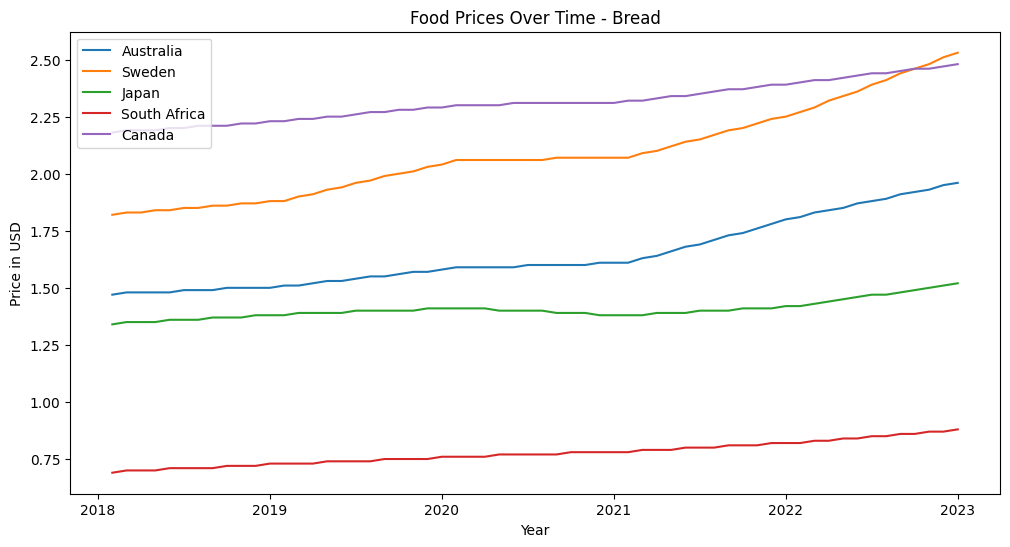

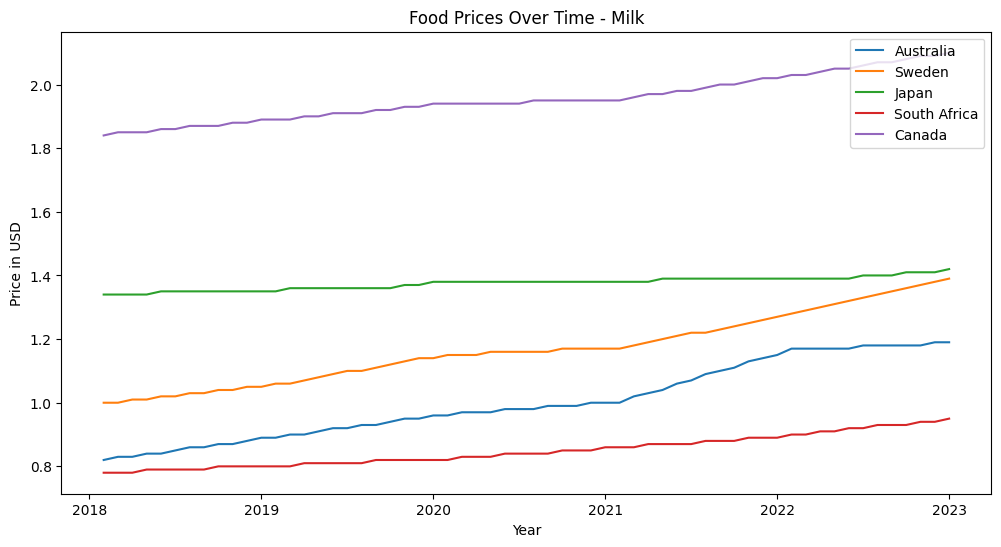

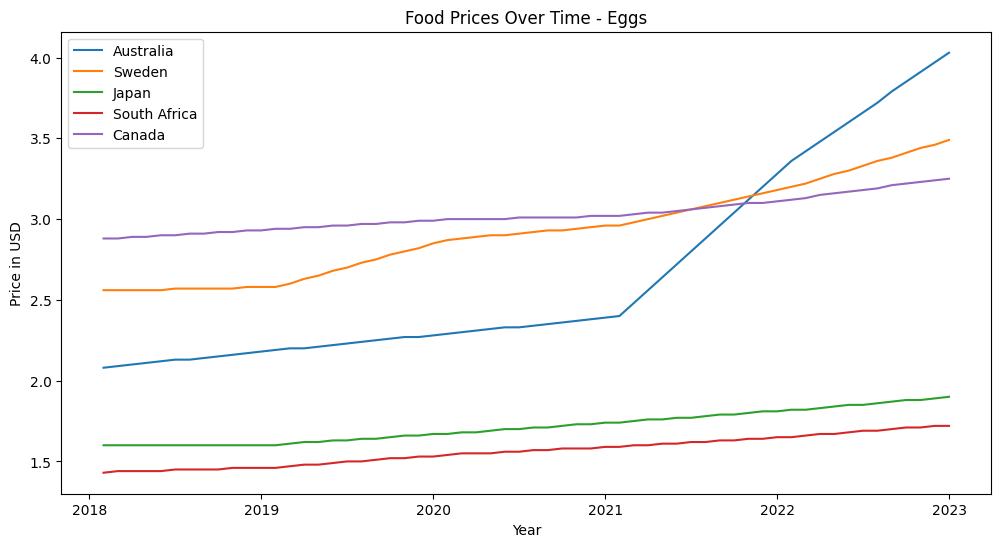

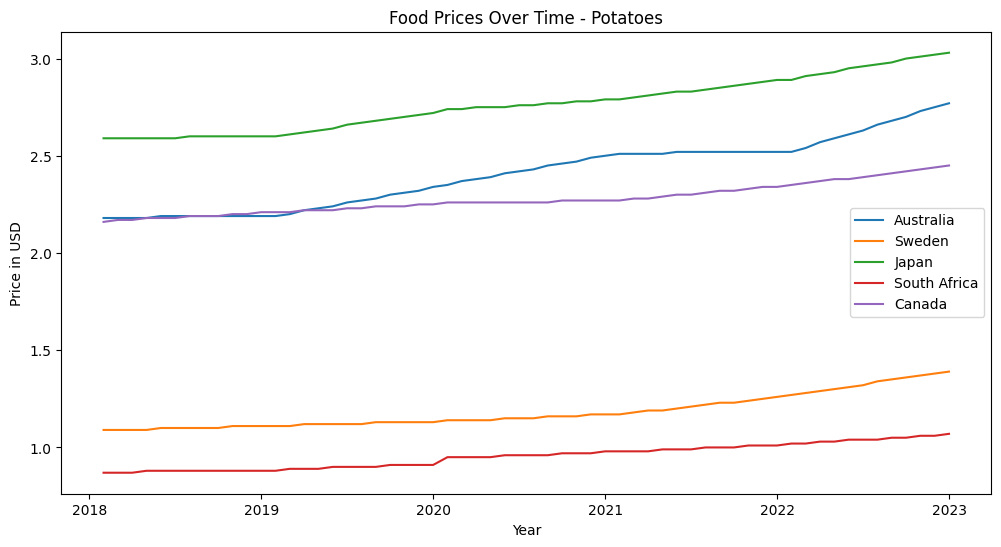

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Select relevant features for prediction
features = ['Country', 'Year', 'Month', 'Food Item', 'Price in USD']

# Keep only the relevant columns
df = df[features]


import matplotlib.pyplot as plt

# Plotting
for food_item in df['Food Item'].unique():
    food_data = df[df['Food Item'] == food_item]

    plt.figure(figsize=(12, 6))
    for country in df['Country'].unique():
        country_data = food_data[food_data['Country'] == country]
        plt.plot(country_data['Year'] + country_data['Month'] / 12, country_data['Price in USD'], label=country)

    plt.title(f'Food Prices Over Time - {food_item}')
    plt.xlabel('Year')
    plt.ylabel('Price in USD')
    plt.legend()
    plt.show()


In [ ]:
# One-hot encoding for 'Country' and 'Food Item'
df = pd.get_dummies(df, columns=['Country', 'Food Item'], prefix=['Country', 'Food'])

# Separate features (X) and target variable (y)
X = df.drop('Price in USD', axis=1)
y = df['Price in USD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.009695833333333318


In [ ]:
df.head()

,Year,Month,Price in USD,Country_Australia,Country_Canada,Country_Japan,Country_South Africa,Country_Sweden,Food_Bread,Food_Eggs,Food_Milk,Food_Potatoes
0,2018,1,1.47,1,0,0,0,0,1,0,0,0
1,2018,2,1.48,1,0,0,0,0,1,0,0,0
2,2018,3,1.48,1,0,0,0,0,1,0,0,0
3,2018,4,1.48,1,0,0,0,0,1,0,0,0
4,2018,5,1.48,1,0,0,0,0,1,0,0,0


In [ ]:
# Convert categorical variables to numerical using Label Encoding
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

# One-hot encoding for 'Food Item'
df = pd.get_dummies(df, columns=['Food Item'], prefix='Food', drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop('Price in USD', axis=1)
y = df['Price in USD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Visualize Predictions
# Inverse transform the Country labels for plotting
X_test['Country'] = le_country.inverse_transform(X_test['Country'])

# One-hot encode categorical columns in X_test
X_test_encoded = pd.get_dummies(X_test, columns=['Country'], drop_first=True)

# Ensure that the columns in X_test_encoded match the columns used during training
missing_columns = set(X.columns) - set(X_test_encoded.columns)
for column in missing_columns:
    X_test_encoded[column] = 0

# Reorder columns to match the order during training
X_test_encoded = X_test_encoded[X.columns]

# Make predictions on the test set
y_pred_test = model.predict(X_test_encoded)


Mean Absolute Error: 0.009004166666666653


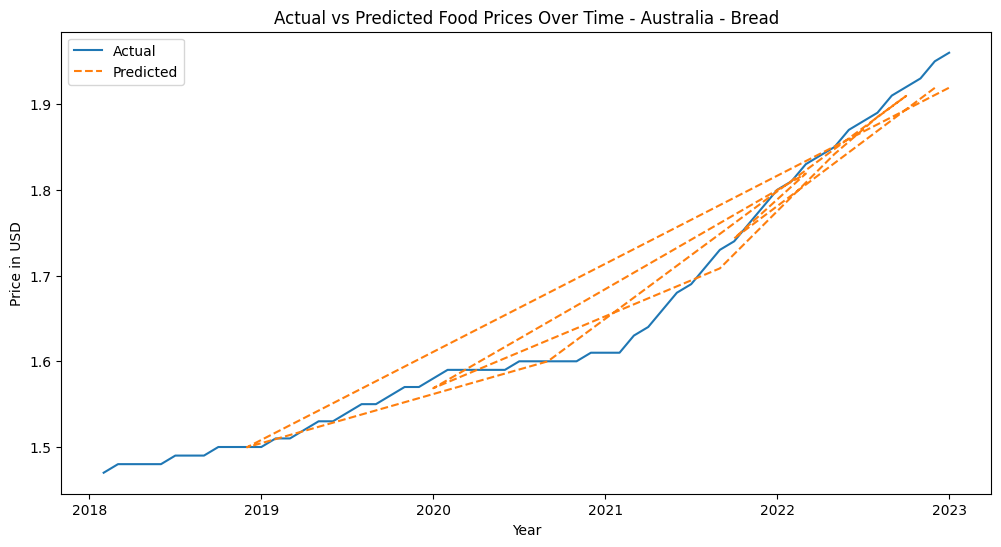

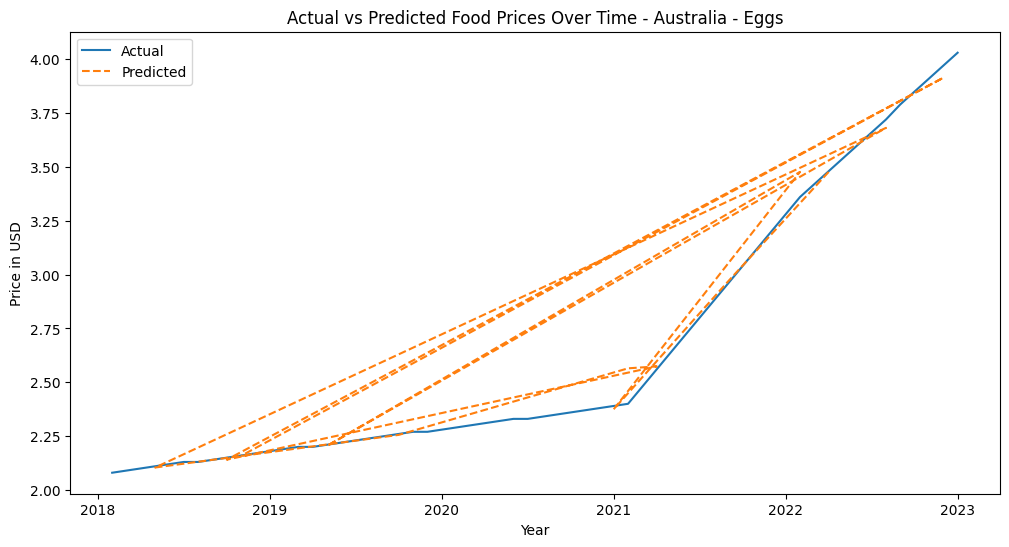

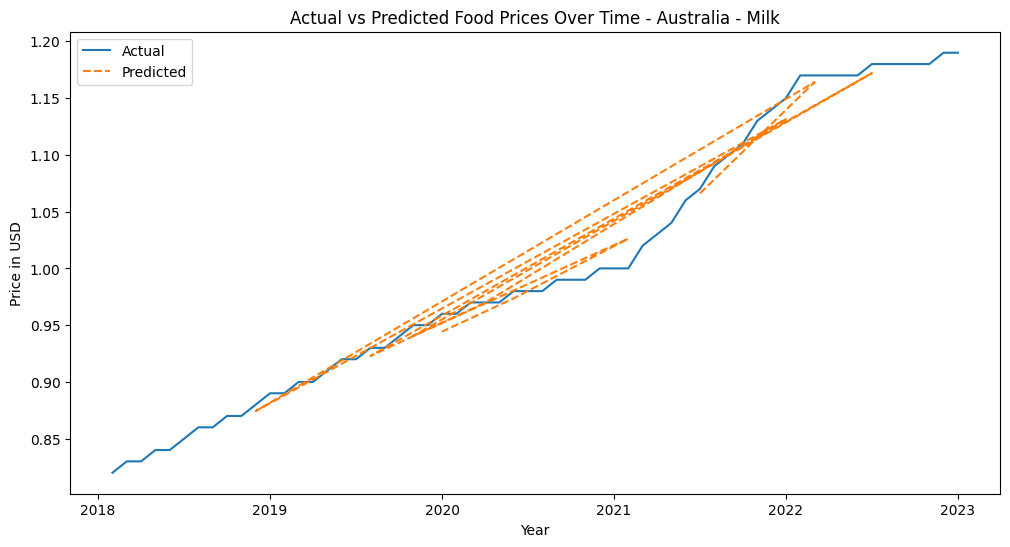

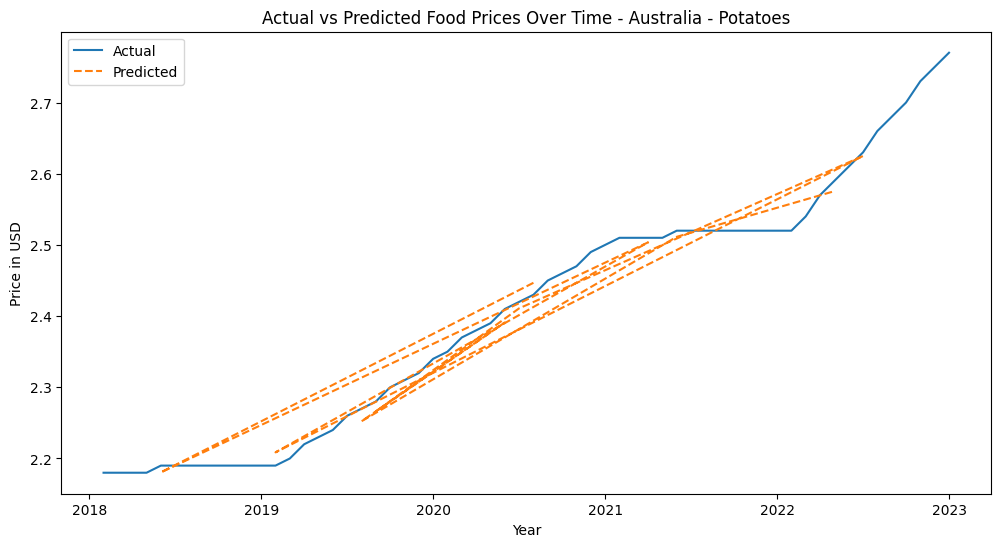

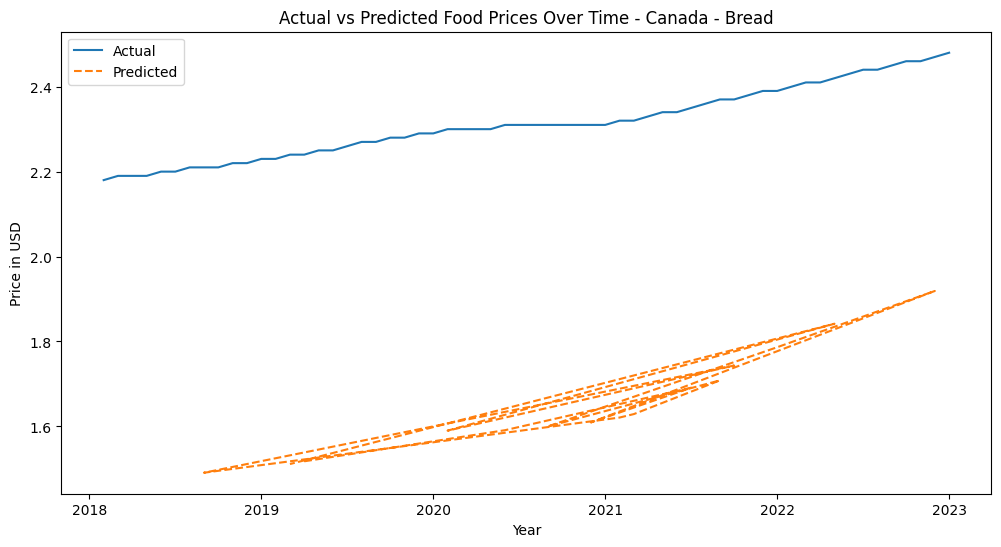

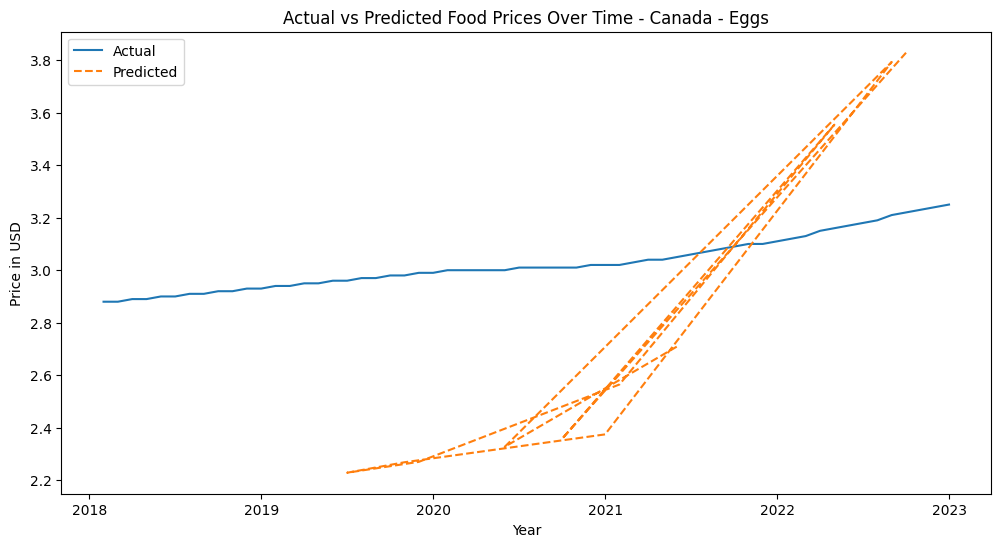

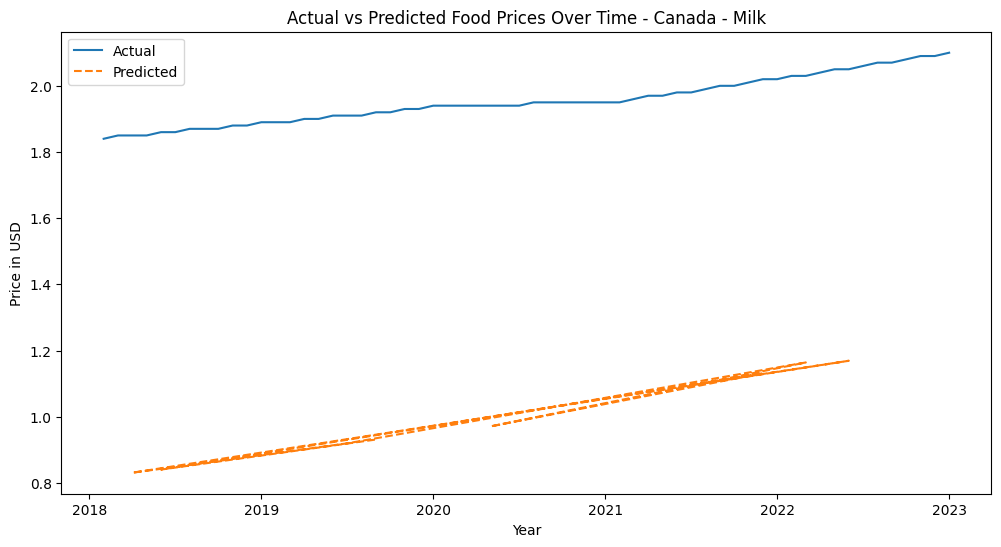

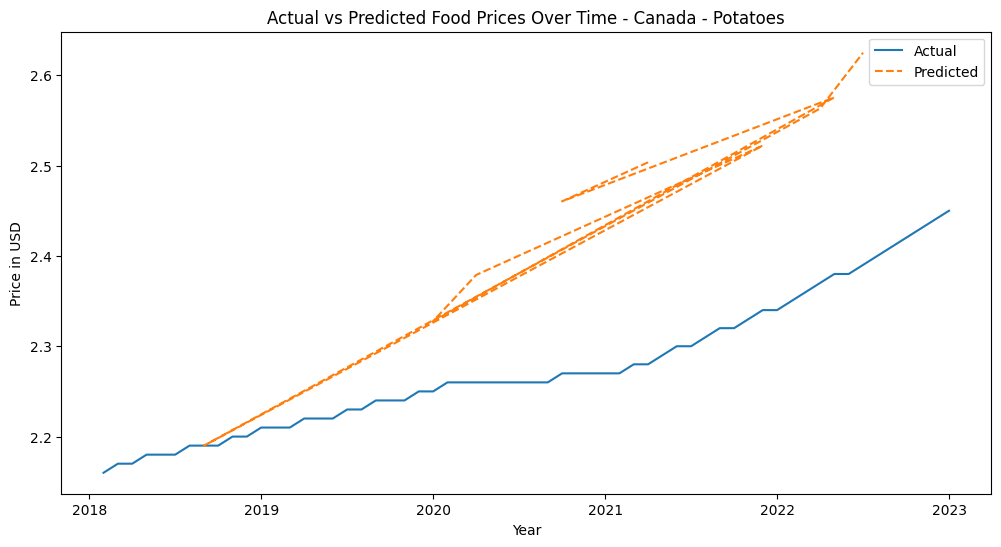

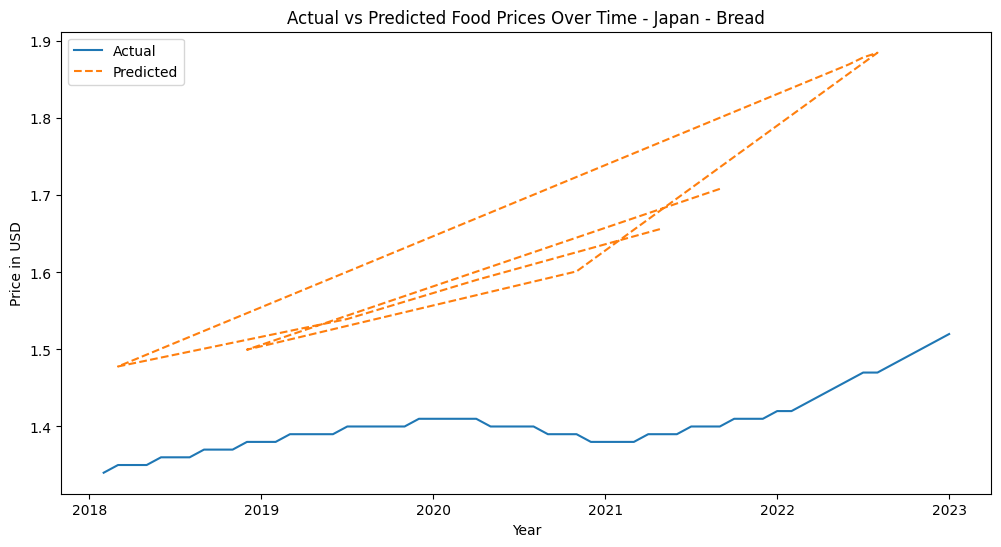

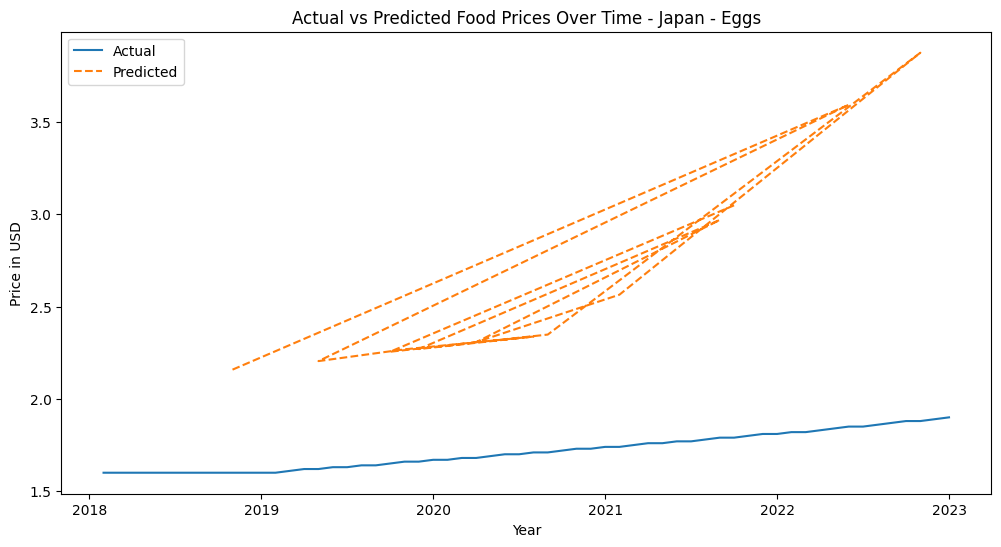

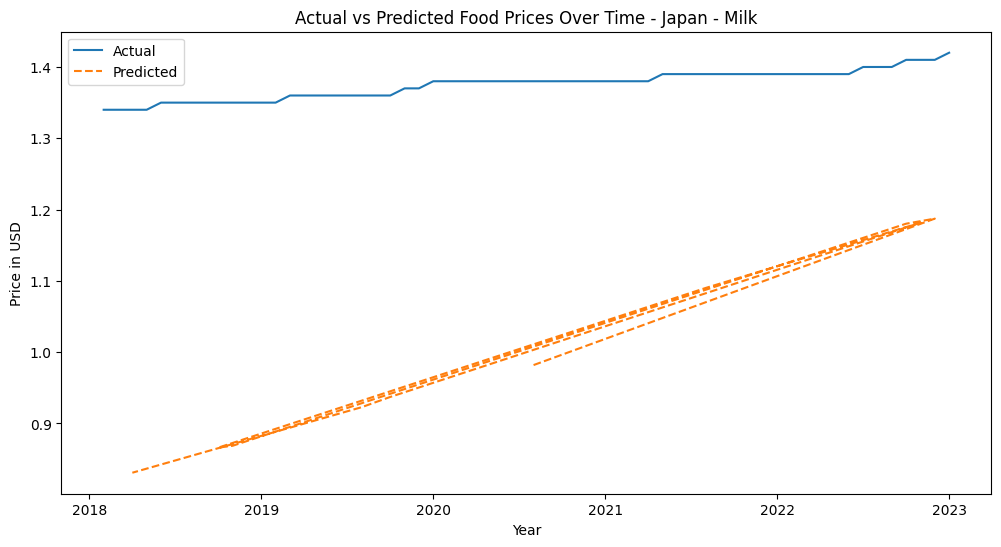

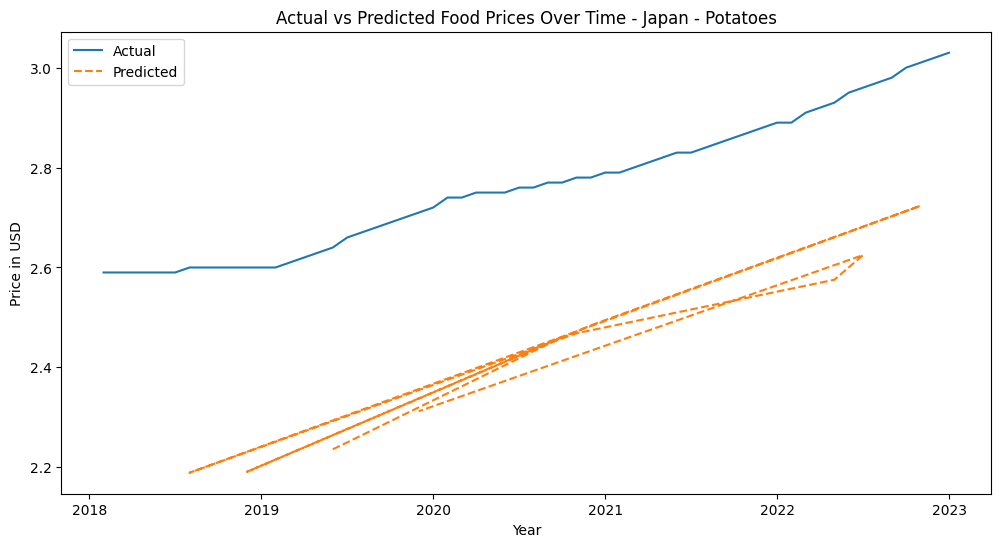

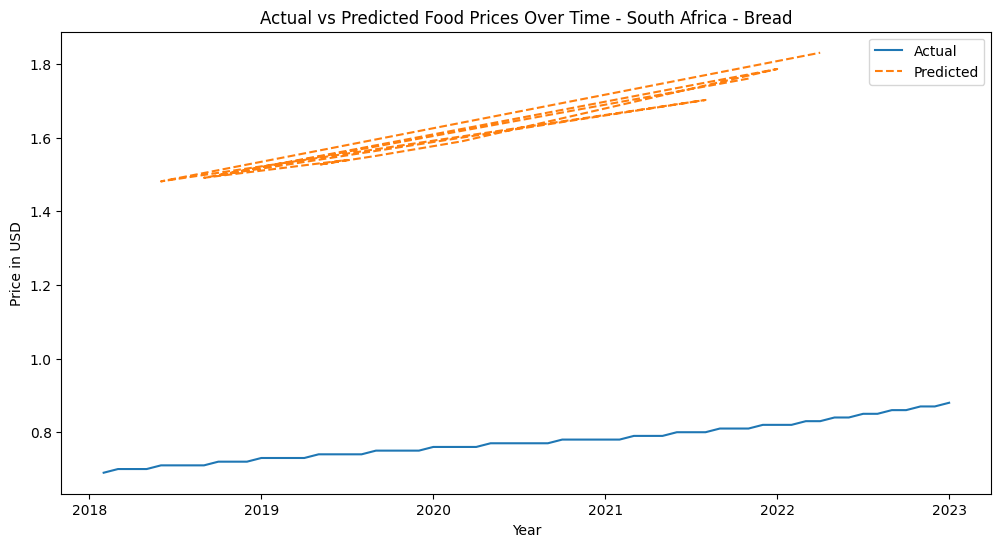

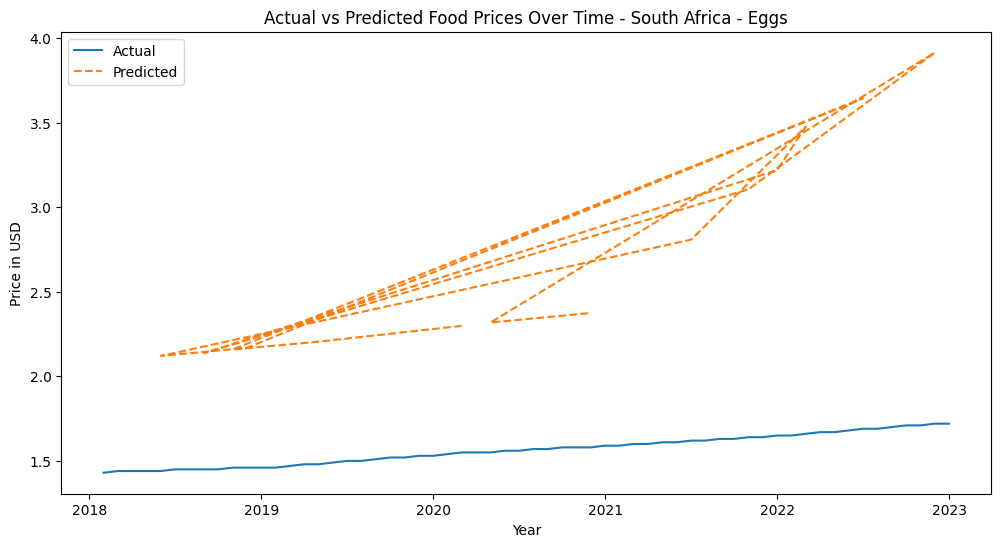

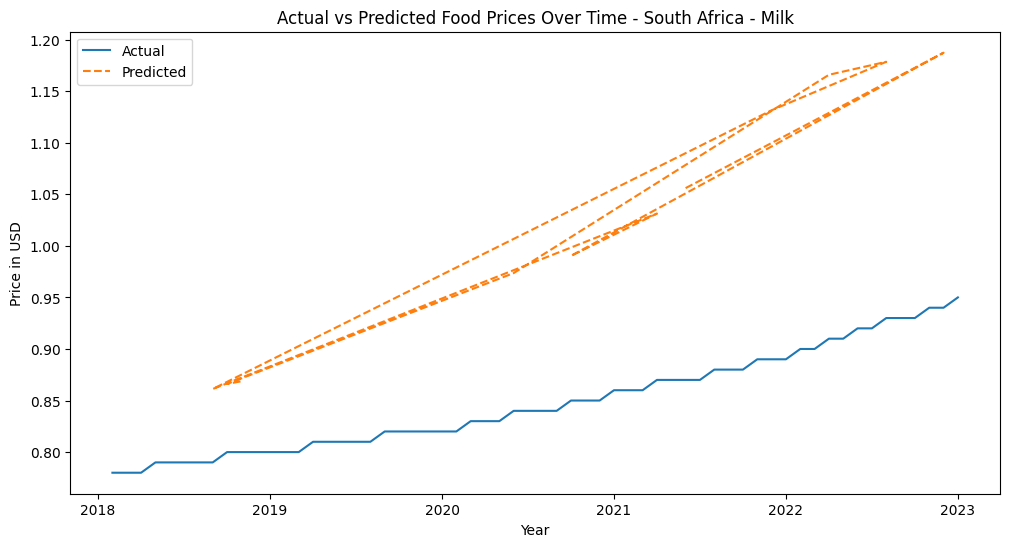

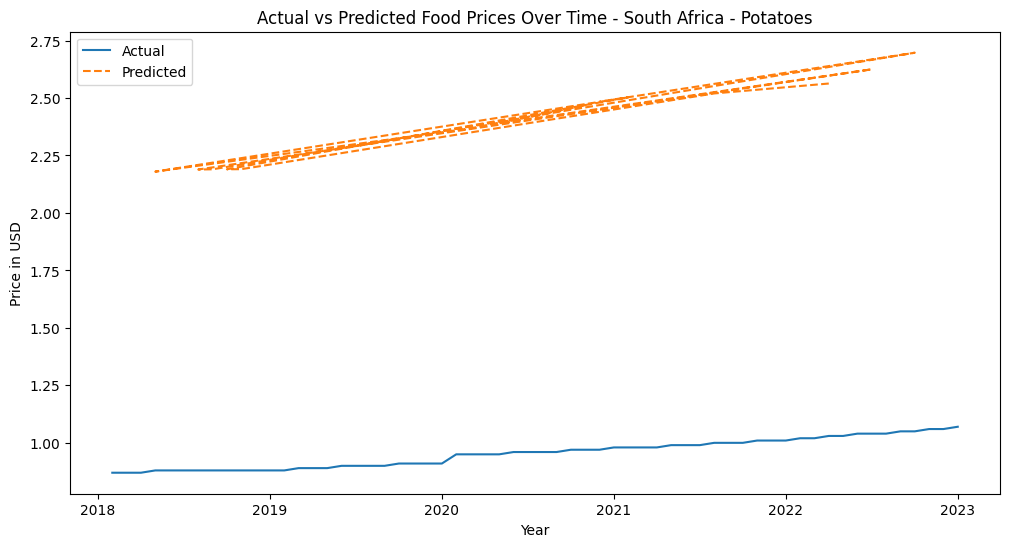

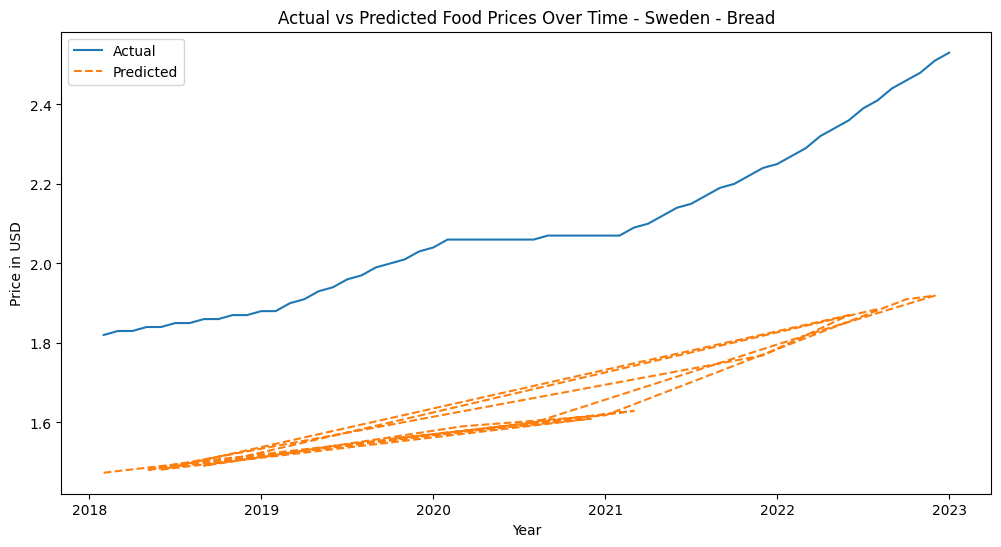

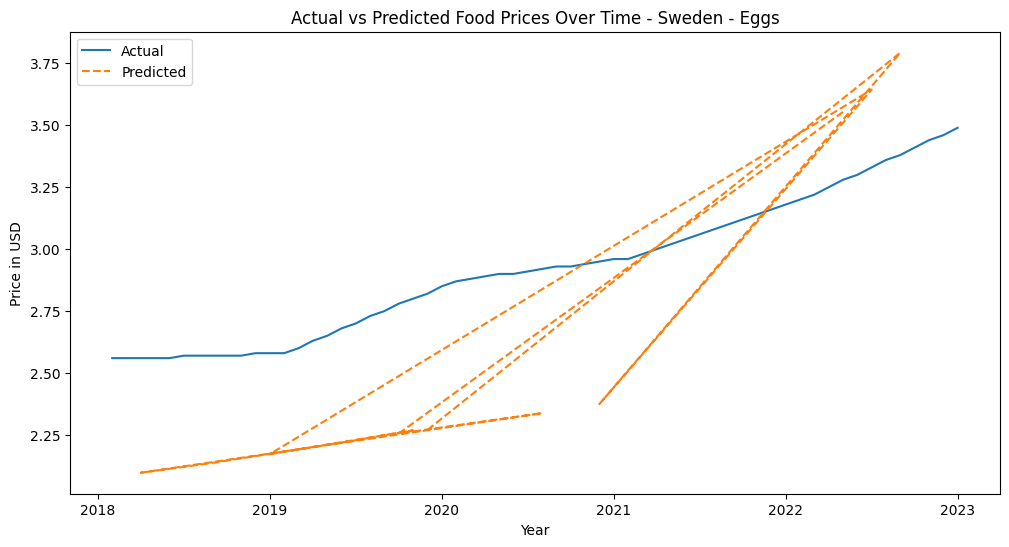

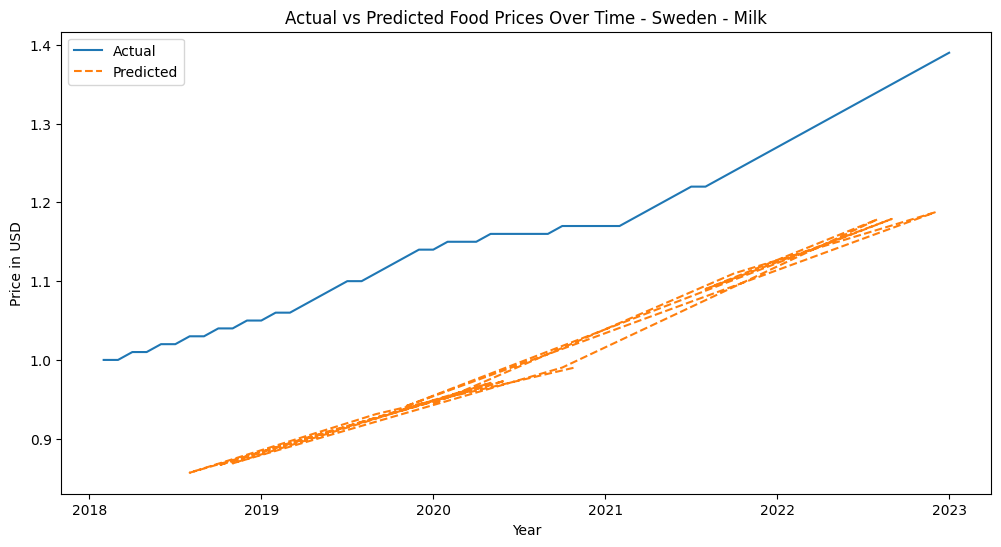

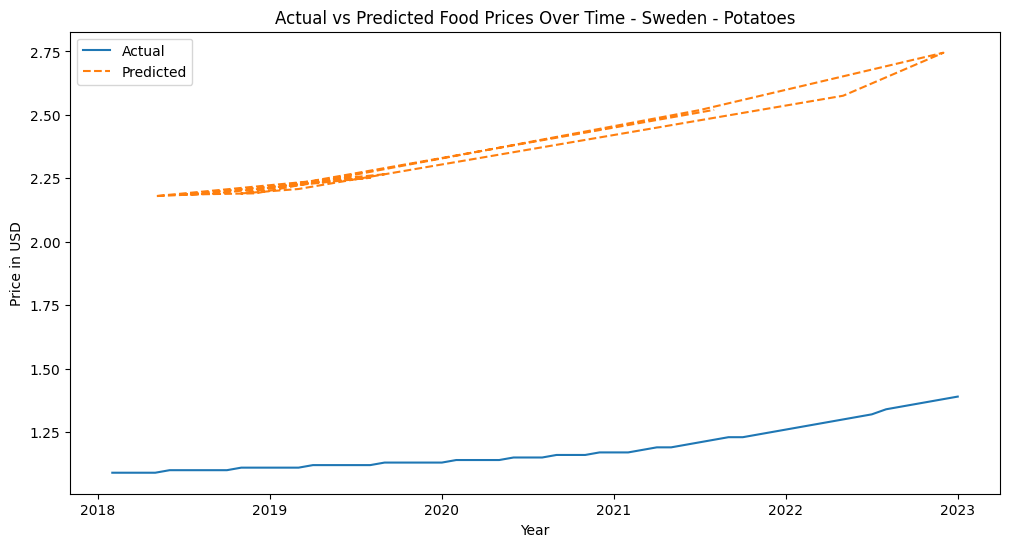

In [ ]:
# Plotting
for country_column in df.columns[df.columns.str.startswith('Country_')]:
    for food_item_column in df.columns[df.columns.str.startswith('Food_')]:
        country = country_column.replace('Country_', '')
        food_item = food_item_column.replace('Food_', '')

        country_data = df[df[country_column] == 1]
        country_data = country_data[country_data[food_item_column] == 1]

        plt.figure(figsize=(12, 6))

        # Plot actual values
        plt.plot(country_data['Year'] + country_data['Month'] / 12, country_data['Price in USD'], label='Actual')

        # Plot predicted values
        country_data_pred = X_test[(X_test[country_column] == 1) & (X_test[food_item_column] == 1)]
        plt.plot(country_data_pred['Year'] + country_data_pred['Month'] / 12, y_pred_test[(X_test[country_column] == 1) & (X_test[food_item_column] == 1)],
                 linestyle='dashed', label='Predicted')

        plt.title(f'Actual vs Predicted Food Prices Over Time - {country} - {food_item}')
        plt.xlabel('Year')
        plt.ylabel('Price in USD')
        plt.legend()
        plt.show()
